In [2]:
import numpy as np
np.random.randint(0,10,size=(2,3))

array([[2, 1, 7],
       [6, 3, 1]])

In [7]:
np.random.seed(666)
np.random.randint(4,8,size=(3,5))

array([[4, 6, 5, 6, 6],
       [6, 5, 6, 4, 5],
       [7, 6, 7, 4, 7]])

In [8]:
np.random.random(size=(3,5))

array([[0.28116849, 0.46284169, 0.23340091, 0.76706421, 0.81995656],
       [0.39747625, 0.31644109, 0.15551206, 0.73460987, 0.73159555],
       [0.8578588 , 0.76741234, 0.95323137, 0.29097383, 0.84778197]])

In [11]:
np.random.normal(5,1,size=(3,5))

array([[5.20996833, 5.22958666, 5.26307642, 7.16633222, 3.95112407],
       [3.15231558, 5.53401503, 3.80425198, 4.71084263, 4.75667297],
       [4.25733347, 6.20790511, 6.02787711, 5.0573882 , 3.43996024]])

In [28]:
x=np.arange(10)
X=np.arange(15).reshape(3,5)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
x=np.array([1,2,3])
y=np.array([3,2,1])
z=np.array([666,666,666])
print(np.concatenate([x,y,z]))
print(np.hstack([x,y,z]))

[  1   2   3   3   2   1 666 666 666]
[  1   2   3   3   2   1 666 666 666]


In [34]:
x=np.arange(10)
x1,x2,x3=np.split(x,[3,7])

In [35]:
L=np.random.random(1000000)
np.sum(L)

500180.0061415275

In [37]:
X=np.arange(16).reshape(4,-1)
np.sum(X,axis=0)

20922789888000

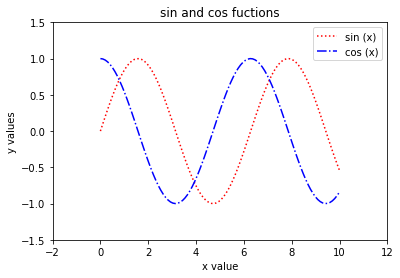

In [38]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 100)
siny = np.sin(x)
cosy = np.cos(x)
plt.plot(x, siny, color='red', linestyle=':', label="sin (x)")    # 生成折线图，可指定颜色、线型、图例等参数
plt.plot(x, cosy, c='b', linestyle='-.', label="cos (x)")    # 再次调用plt.plot可绘制下一条曲线
plt.axis([-2, 12, -1.5, 1.5])    # 指定 x 和 y 轴显示范围
plt.xlabel("x value")    # 添加 x 轴文字说明
plt.ylabel("y values")    # 添加 y 轴文字说明
plt.legend()    # 要求显示图例
plt.title("sin and cos fuctions")
plt.show()    # 最后渲染生成图像

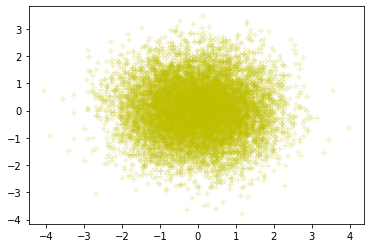

In [39]:
x = np.random.normal(0, 1, 10000)
y = np.random.normal(0, 1, 10000)
plt.scatter(x, y, c='y', alpha=0.2, marker='+')    # 可指定颜色、透明度、散点图形等参数
plt.show()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

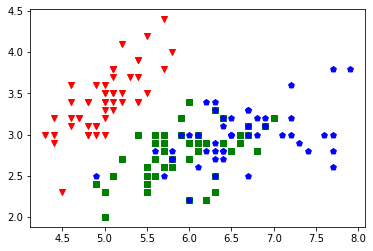

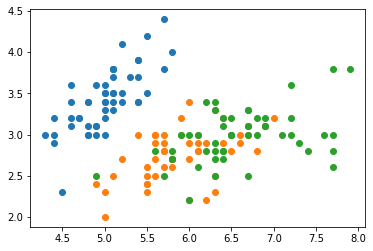

In [41]:
# coding:utf-8
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())    # 查看数据集字典键值
print(iris.DESCR)    # 查看数据集文档
print(iris.data)    # 查看特征值
print(iris.data.shape)    # 查看样本数目和特征数目
print(iris.feature_names)    # 查看特征名称
print(iris.target)    # 查看数据集标签值
print(iris.target.shape)    # 查看标签数目
print(iris.target_names)    # 查看标签名称
X = iris.data    # 所有特征仅取前两种
y = iris.target
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='v')    # 所有样本中，第一个标签对应的前两个特征
plt.scatter(X[y==1, 0], X[y==1, 1], c='g', marker='s')    # 所有样本中，第二个标签对应的前两个特征
plt.scatter(X[y==2, 0], X[y==2, 1], c='b', marker='p')    # 所有样本中，第三个标签对应的前两个特征
plt.show()
# 可用 for 循环绘制散点图
for i in [0, 1, 2]:
    plt.scatter(X[y==i, 0], X[y==i, 1])
plt.show()